# Welcome to RestHub notebook
### Before starting the to code please ensure you have the rhapi.py file in this same directory
Please run the cells below for all the installations in using for the first time

In [1]:
# this is used for installation of packages required for extractin the data
!pip install numpy
!pip install pandas
!pip install urllib3
!pip install beautifulsoup4
!pip install ilock
!pip install itables
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# imports required
import pandas as pd
from io import StringIO
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
from rhapi import *
url="https://cmsdca.cern.ch/trk_rhapi"
import itables.options as opt
opt.maxBytes = 0

<IPython.core.display.Javascript object>

# 1. Login
### We have two login functions available:
a.. Cern Single Sign On login(for users with simple login) \
b.. Login with 2FA (for users with two factor authencication active) \



In [3]:
test=input("Do you have TWO FACTOR AUTH enabled Y/N:")
if test=='Y' or test=='y':
  rh = RhApi(url, debug = True,sso='login2') #use sso="login2" for 2fa and "login" for general use
else:
  rh = RhApi(url, debug = True,sso='login')
rh.folders()
# if it generates the output:: ['trker_cmsr', 'trker_int2r']
# then you are good to go and are logged in


Do you have TWO FACTOR AUTH enabled Y/N: n


RhApi:url = https://cmsdca.cern.ch/trk_rhapi/
RhApi:https://cmsdca.cern.ch/trk_rhapi/tables?with payloadNoneand headersNone


Username:  dimattia
Password:  ········


RhApi:Response200application/json; charset=UTF-8


['trker_cmsr', 'trker_int2r']

# 2. Browsing Kind of parts and parts list

### 2a)  KIND OF PARTS
Through the below table you can check the following: \
1. Name of Kind of Part
2. Part_Table


In [4]:
df = pd.read_csv(StringIO(rh.csv("select * from trker_cmsr.kinds_of_part p ")), sep=",")
show(df, column_filters="footer", dom="lrtip")

RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.kinds_of_part p "and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b6?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b6/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b6/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


### 2b Parts list
From the above table you can the Part_Table name which can be used to browse
1. all the details of that particular kind of part \
2. part id which can be used to browse condition data



To see which columns are all related with this king of part execute the statement below \
The Columns starting with A are the attributed which can be attached to that kind of part

In [5]:
#*****do not edit*********************
part_table=input('Enter the part table name like p7620 or p1120 from the above table::')
for c in rh.table('trker_cmsr',part_table)['columns']:
  print(f'{c["name"]}\t{c["type"]}')

Enter the part table name like p7620 or p1120 from the above table:: p1160


RhApi:https://cmsdca.cern.ch/trk_rhapi/table/trker_cmsr/p1160?with payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
ID	NUMBER
RECORD_INSERTION_TIME	DATE
LOCATION	STRING
PART_PARENT_ID	NUMBER
KIND_OF_PART_ID	NUMBER
KIND_OF_PART	STRING
MANUFACTURER	STRING
BARCODE	STRING
SERIAL_NUMBER	STRING
VERSION	STRING
NAME_LABEL	STRING
PRODUCTION_DATE	DATE
BATCH_NUMBER	STRING
DESCRIPTION	STRING
ASENSOR_ORIENTATION	STRING
ASENSOR_TYPE	STRING
ASTATUS	STRING
ASENSOR_KNOWN_PROBLEM	STRING


### 2c) PART ID Search
Now we will learn to find a specific part \

Point to note here that resthub is published only a subset of data so if the desired browsing is not enough please see the successive instructions


In [6]:

#*******************do no edit***********************************#
part_table=input('Enter the part table name like p7620 or p1120 from the above table::')

def show_query(queries):
  df = pd.read_csv(StringIO(rh.csv(queries)), sep=",")
  show(df, column_filters="footer", dom="lrtip")

def options():
  print("Your database query is too big.")
  print("Enter 0 to display the first 1000 columns")
  print("Enter 1 to search by location")
  print("Enter 2 to reduce the area by enter a RECORD INSERTION DATE range")
  print("Note in case the query is still too big it will show first 1000 lines")

  a=input("YOUR CHOICE FROM ABOVE :")
  return a

try:
  queries= "select * from trker_cmsr.{prt_tb} p "
  queries=queries.format(prt_tb=part_table)
  show_query(queries)
except:
  while(True):
    a=options()
    if a=='0':
      queries= "select * from trker_cmsr.{prt_tb} p FETCH FIRST 1000 ROWS ONLY"
      queries=queries.format(prt_tb=part_table)
      show_query(queries)
      break
    elif a=='1':
      location=input("A location or part of it :")
      queries= "select * from trker_cmsr.{prt_tb} p where p.location LIKE '%{location}%' FETCH FIRST 1000 ROWS ONLY "
      queries = queries.format(prt_tb=part_table, location=location)
      show_query(queries)
      break
    elif a=='2':
      date1=input("Enter search start date as YYYY-MM-DD like 2022-11-17 please strictly follow:")
      date2=input("Enter search end date as YYYY-MM-DD like 2022-11-17 please strictly follow:")
      queries= "select * from trker_cmsr.{prt_tb} p where p.record_insertion_time BETWEEN TO_DATE('{start_date}', 'YYYY-MM-DD') AND TO_DATE('{end_date}', 'YYYY-MM-DD') FETCH FIRST 1000 ROWS ONLY"
      queries=queries.format(prt_tb=part_table,start_date=date1,end_date=date2)
      show_query(queries)
      break
    else:
      print("wrong choice try again")


Enter the part table name like p7620 or p1120 from the above table:: p1160


RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.p1160 p "and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b7?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b7/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
Your database query is too big.
Enter 0 to display the first 1000 columns
Enter 1 to search by location
Enter 2 to reduce the area by enter a RECORD INSERTION DATE range
Note in case the query is still too big it will show first 1000 lines


YOUR CHOICE FROM ABOVE : 2
Enter search start date as YYYY-MM-DD like 2022-11-17 please strictly follow: 2020-05-01
Enter search end date as YYYY-MM-DD like 2022-11-17 please strictly follow: 2020-07-01


RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.p1160 p where p.record_insertion_time BETWEEN TO_DATE('2020-05-01', 'YYYY-MM-DD') AND TO_DATE('2020-07-01', 'YYYY-MM-DD') FETCH FIRST 1000 ROWS ONLY"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b8?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b8/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b8/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


# 3. Browsing the condition data with help of part ID and DATASETS tables

### 3a) Browsing from part id(which is stated as ID in above table 2c) to search for Conditions attached

In [7]:
#part_id='24306'   .... name_label="33234_020_PSS_MAINB'
#****************do not edit*************************
part_id=input("input Part ID you are searching for:")
queries="select * from trker_cmsr.datasets p where p.part_id LIKE '{part_id}%' FETCH FIRST 1000 ROWS ONLY"
queries = queries.format(part_id=part_id)
df = pd.read_csv(StringIO(rh.csv(queries)), sep=",")
show(df, column_filters="footer", dom="lrtip")

input Part ID you are searching for: 24306


RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.datasets p where p.part_id LIKE '24306%' FETCH FIRST 1000 ROWS ONLY"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b9?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b9/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b9/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


### 3b) From the above table now we can find a particular condition data with the help of:
1. ID (First Column of above Table of 3a)
2. KIND_OF_CONDITION_ID (8th Column of above Table 3a)\
we can obtain the condition data

In [8]:
#id=1584618
#kind_of_c_id=13440
#****************do not edit*************************
id=input("enter the ID you want to search for:")
kind_of_c_id=str(input("enter the kind of condition id you want to search for:"))
queries="select * from trker_cmsr.c{kocid} p where p.condition_data_set_id='{id}' FETCH FIRST 1000 ROWS ONLY"
queries = queries.format(kocid=kind_of_c_id,id=id)
df = pd.read_csv(StringIO(rh.csv(queries)), sep=",")
show(df, column_filters="footer", dom="lrtip")

enter the ID you want to search for: 20941
enter the kind of condition id you want to search for: 1700


RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.c1700 p where p.condition_data_set_id='20941' FETCH FIRST 1000 ROWS ONLY"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b2?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b2/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2b2/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


# 4. Browsing directly from kinds of conditions

### 4a) Printing the list of conditions for find kind_of_condition_id
The list below directly gives us the kind_of_condition_id

In [9]:
df = pd.read_csv(StringIO(rh.csv("select * from trker_cmsr.conditions p")), sep=",")
show(df, column_filters="footer", dom="lrtip")

RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.conditions p"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2ba?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2ba/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2ba/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


### 4b)If you know the part_id you are searching for we can use that to check for:
1. all the condition data for that part for a particular kind of condition
2. For example a condition Tracker Strip-Sensor IV Test can have multiple enteries for a specific part. This will print all of the above


In [11]:
#*****************do not edit************************
part_id=str(input("input Part ID you are searching for:"))
koc_id=str(input("input ID from table 4a for condition you are searching for:"))
#koc_id='13440'
#part_id='130814'
queries="select * from trker_cmsr.c{koc_id} p where p.part_id LIKE '{part_id}%' FETCH FIRST 1000 ROWS ONLY"
queries = queries.format(koc_id=koc_id,part_id=part_id)
df = pd.read_csv(StringIO(rh.csv(queries)), sep=",")
show(df, column_filters="footer", dom="lrtip")

input Part ID you are searching for: 130814
input ID from table 4a for condition you are searching for: 13440


RhApi:https://cmsdca.cern.ch/trk_rhapi/query?with payload"select * from trker_cmsr.c13440 p where p.part_id LIKE '130814%' FETCH FIRST 1000 ROWS ONLY"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2bc?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2bc/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:https://cmsdca.cern.ch/trk_rhapi/query/o18d0d5ed2bc/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


In [12]:
import matplotlib.pyplot as plt
med  = df[ df["CROC_DATA_ID"] == "VCAL_MED"]
high = df[ df["CROC_DATA_ID"] == "VCAL_HIGH"]
show(med, column_filters="footer", dom="lrtip")
show(high, column_filters="footer", dom="lrtip")


(-10.0, 10.0)

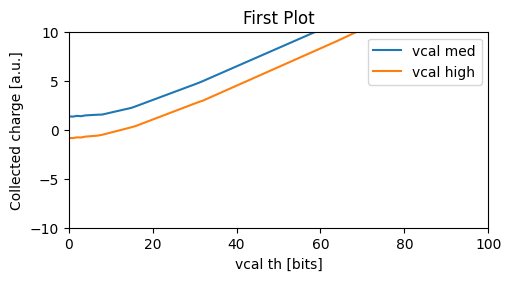

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

ax.plot(med["X"], med["Y"], label='vcal med') 
ax.plot(high["X"], high["Y"], label='vcal high')
ax.set_xlabel('vcal th [bits]')  
ax.set_ylabel('Collected charge [a.u.]')
ax.set_title("First Plot")  # Add a title to the axes.
#ax.set_yscale("log")
ax.legend()  # Add a legend.
plt.xlim([0, 100])
plt.ylim([-10, 10])
#plt.show()
